In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np

# 1. Data cleaning

In [2]:
cheaters = pd.read_csv('Cheaters.csv')
cheaters.head()

,user_id,cheaters
0,TWLWB9-L19SYJ,0
1,SD0L4U-1JG4WN,0
2,QZVG35-P8JKNU,0
3,S2VBV4-ZKBHI6,0
4,DDGKMQ-45SP8R,0


In [3]:
cheaters_nodups = cheaters.drop_duplicates()

In [4]:
cheaters = cheaters_nodups[cheaters_nodups['cheaters'] == True]
not_cheaters = cheaters_nodups[cheaters_nodups['cheaters'] == False]

In [5]:
cheaters.head()

,user_id,cheaters
65,9WIF40-OW5GLD,1
778,VIHC8Q-YTCOYH,1
4060,1JBTR8-YEDSAI,1
5520,KK8ZQ3-ZZVKN4,1
6631,IC2BED-VNNI2F,1


In [7]:
not_cheaters.head()

,user_id,cheaters
0,TWLWB9-L19SYJ,0
1,SD0L4U-1JG4WN,0
2,QZVG35-P8JKNU,0
3,S2VBV4-ZKBHI6,0
4,DDGKMQ-45SP8R,0


In [8]:
len_cheaters, len_not_cheaters = len(cheaters), len(not_cheaters)
print('Cheaters count:', len_cheaters,'\nNot cheaters count:', len_not_cheaters) 

Cheaters count: 353 
Not cheaters count: 1079647


In [9]:
df_money = pd.read_csv('Money.csv')
df_money.head()

,user_id,date,money
0,N4TS2T-P7YTVX,15.07.2021,1.99
1,NX9S0D-VM20W8,16.07.2021,0.99
2,QYY6FW-FKHRND,15.07.2021,0.00
3,BRWH4Y-LPGBU6,14.07.2021,0.00
4,8O317F-4ASK53,13.07.2021,0.00


In [10]:
df_money = df_money.groupby(['user_id'])['money'].sum().reset_index(name = 'trans_sum')
df_money.head()

,user_id,trans_sum
0,00036L-1T885I,1.98
1,0004MK-MRBUKF,3.97
2,0004MK-VW0O9L,3.97
3,0005S4-UEC6BE,4.96
4,0007I5-EWUD6O,4.95


In [11]:
df_cash = pd.read_csv('Cash.csv')
df_cash_copy = df_cash.copy()


In [12]:
df_cash = df_cash.groupby(['user_id'])['cash'].sum().reset_index(name = 'game_cash')
df_cash.head()

,user_id,game_cash
0,00036L-1T885I,7600
1,0004MK-MRBUKF,6150
2,0004MK-VW0O9L,6300
3,0005S4-UEC6BE,5000
4,0007I5-EWUD6O,6350


In [13]:
merged_money = pd.merge(df_money, df_cash, on = 'user_id', how = 'inner')
merged_money.head()

,user_id,trans_sum,game_cash
0,00036L-1T885I,1.98,7600
1,0004MK-MRBUKF,3.97,6150
2,0004MK-VW0O9L,3.97,6300
3,0005S4-UEC6BE,4.96,5000
4,0007I5-EWUD6O,4.95,6350


# 2. Data visualization

In [14]:
df_cash_copy = df_cash_copy.groupby(['user_id', 'date'])['cash'].sum().reset_index()
cheaters_transactions = pd.merge(cheaters, df_cash_copy, on = 'user_id', how = 'left')

In [16]:
cheaters_transactions.describe()

,cheaters,cash
count,2824.0,2824.000000
mean,1.0,18350.991501
std,0.0,16069.479162
min,1.0,0.000000
25%,1.0,5200.000000
50%,1.0,16200.000000
75%,1.0,28600.000000
max,1.0,148200.000000


In [17]:
cheaters_transactions = cheaters_transactions.groupby(['date'])['cash'].sum().reset_index()
cheaters_transactions.head(8)

,date,cash
0,10.07.2021,6944450
1,11.07.2021,6966450
2,12.07.2021,7185050
3,13.07.2021,6506100
4,14.07.2021,6417200
5,15.07.2021,5246250
6,16.07.2021,4633500
7,17.07.2021,7924200


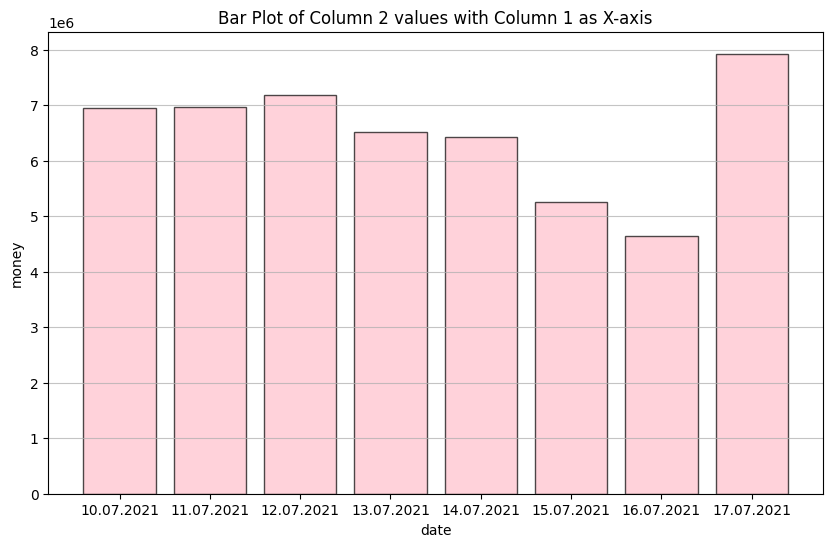

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(cheaters_transactions['date'], cheaters_transactions['cash'], color='pink', edgecolor='black', alpha=0.7)
plt.title('Bar Plot of Column 2 values with Column 1 as X-axis')
plt.xlabel('date')
plt.ylabel('money')
plt.grid(axis='y', alpha=0.75)
plt.show()

### The highest incidence of cheating occurred on July 17, 2021 and July 12, 2021, while the lowest was observed on July 16, 2021.

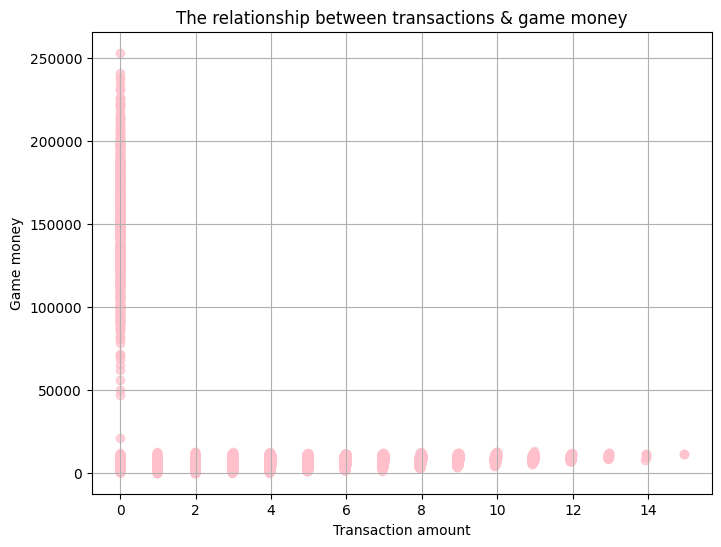

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_money['trans_sum'], merged_money['game_cash'], marker='o', color='pink', alpha=0.7)
plt.title('The relationship between transactions & game money')
plt.xlabel('Transaction amount')
plt.ylabel('Game money')
plt.grid(True)
plt.show()

In [20]:
merged_money_copy = merged_money.copy()

In [21]:
merged_cheaters_money = pd.merge(cheaters, merged_money_copy, on = 'user_id', how = 'left')

In [22]:
merged_cheaters_money.head()

,user_id,cheaters,trans_sum,game_cash
0,9WIF40-OW5GLD,1,0.0,143000
1,VIHC8Q-YTCOYH,1,0.0,118100
2,1JBTR8-YEDSAI,1,0.0,89600
3,KK8ZQ3-ZZVKN4,1,0.0,181100
4,IC2BED-VNNI2F,1,0.0,119650


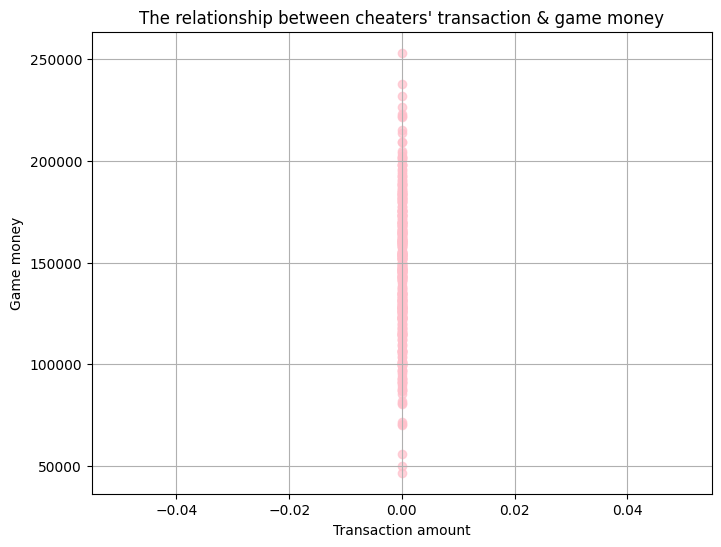

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_cheaters_money['trans_sum'], merged_cheaters_money['game_cash'], marker='o', color='pink', alpha=0.7)
plt.title("The relationship between cheaters' transaction & game money")
plt.xlabel('Transaction amount')
plt.ylabel('Game money')
plt.grid(True)
plt.show()

In [24]:
merged_notcheaters_money = pd.merge(not_cheaters, merged_money_copy, on = 'user_id', how = 'left')

In [25]:
merged_notcheaters_money['game_cash'].max()

240950.0

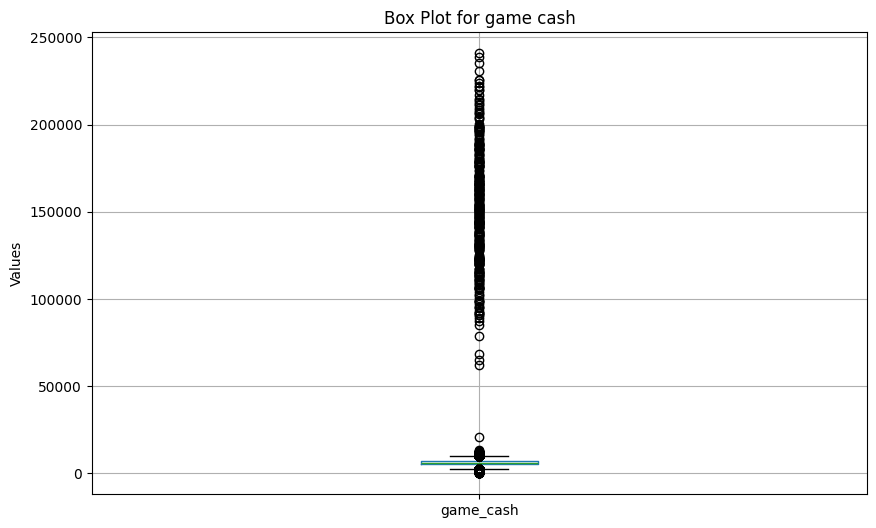

In [26]:
plt.figure(figsize=(10, 6))
merged_notcheaters_money.boxplot(column = ['game_cash'])
plt.title('Box Plot for game cash')
plt.ylabel('Values')
plt.show()

### The visualized data reveals noticeable outliers. Additionally, it has been observed that cheaters show a transaction amount of 0.00, indicating they have not made any real-money purchases for in-game cash

# 3. Finding anomalies
mean, median, 3-sigma & IQR methods

In [24]:
merged_notcheaters_money['game_cash'].describe()

count    1.078596e+06
mean     6.061173e+03
std      3.002947e+03
min      5.000000e+01
25%      5.050000e+03
50%      6.000000e+03
75%      6.950000e+03
max      2.409500e+05
Name: game_cash, dtype: float64

In [25]:
median = merged_notcheaters_money['game_cash'].median()
std = merged_notcheaters_money['game_cash'].std()
mean = merged_notcheaters_money['game_cash'].mean()
print('Median:', median,'\nMean:', mean,'\nStandart deviation:', std)

Median: 6000.0 
Mean: 6061.172533552878 
Standart deviation: 3002.9467556358727


### 3 Sigmas

In [26]:
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

In [27]:
sigmas_anomalies = merged_notcheaters_money[
(merged_notcheaters_money['game_cash'] > upper_bound) | (merged_notcheaters_money['game_cash'] < lower_bound)
]

In [28]:
sigmas_anomalies.head()

,user_id,cheaters,trans_sum,game_cash
1474,U9N50N-L8C4MA,0,0.0,161600.0
1575,XKTIX5-M7HG8T,0,0.0,166000.0
5637,66E4WV-I63558,0,0.0,150100.0
6159,KZMWZ9-M61WFH,0,0.0,132050.0
7365,ZQNX2R-TGBYZ0,0,0.0,147200.0


In [29]:
print('Number of amonalies:', len(sigmas_anomalies))

Number of amonalies: 343


### IQR

In [30]:
zero_transactions = merged_notcheaters_money[merged_notcheaters_money['trans_sum'] == 0]

In [31]:
q1 = zero_transactions['game_cash'].quantile(0.25)
q3 = zero_transactions['game_cash'].quantile(0.75)

In [32]:
iqr = q3 - q1
iqr

1950.0

In [33]:
print(f'Q3: {q3}\nQ1: {q1}')

Q3: 6400.0
Q1: 4450.0


In [34]:
lower_b = q1 - 1.5 * iqr
upper_b = q3 + 1.5 * iqr

In [35]:
iqr_anomalies = zero_transactions[(zero_transactions['game_cash'] > upper_b)]

In [36]:
print('Number of amonalies:', len(iqr_anomalies))

Number of amonalies: 526


In [37]:
data_df_sigmas = pd.merge(sigmas_anomalies, df_cash_copy, on = 'user_id', how = 'left')

In [38]:
data_df_sigmas.drop(columns=(['cheaters', 'trans_sum', 'game_cash', 'user_id']), inplace=True)

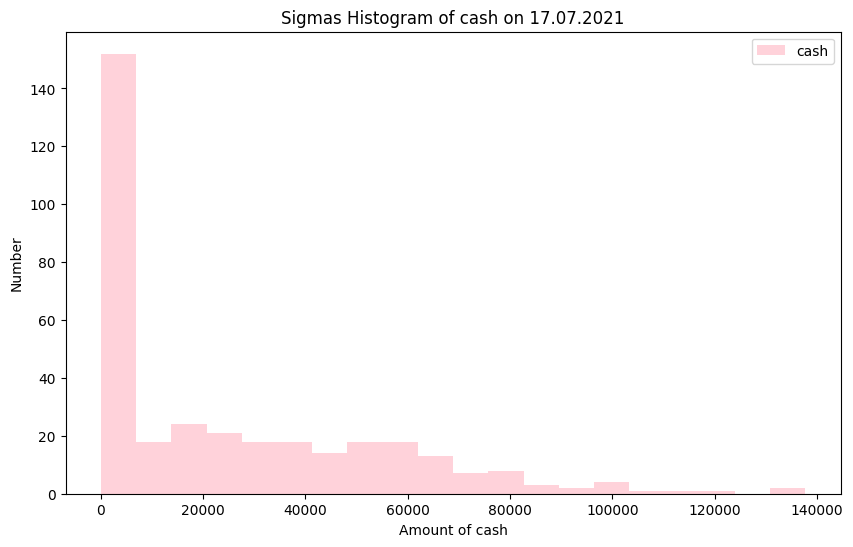

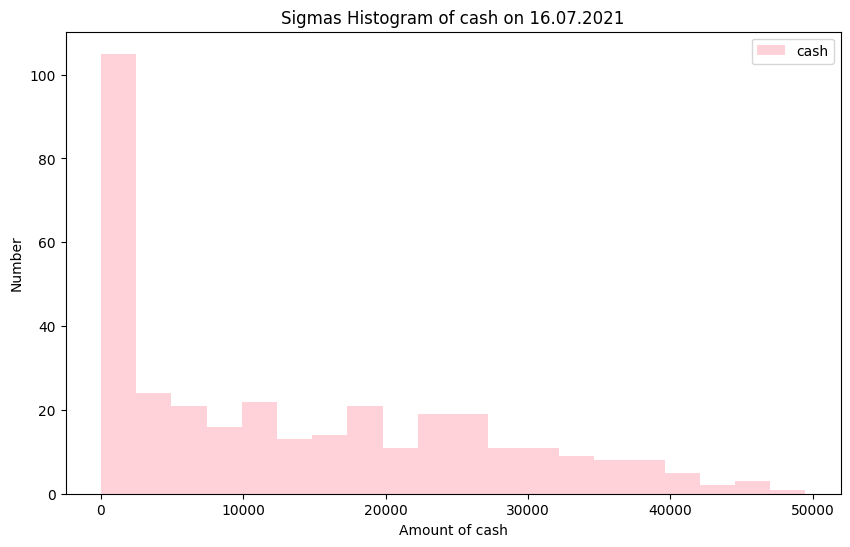

In [39]:
dates_of_interest = ['17.07.2021', '16.07.2021']
for date in dates_of_interest:
    filtered_df = data_df_sigmas[data_df_sigmas['date'] == date]
    plt.figure(figsize=(10, 6))
    for col in filtered_df.select_dtypes(include='number').columns:
        plt.hist(filtered_df[col], color = 'pink', bins=20, alpha=0.7, label=col)
        plt.title(f'Sigmas Histogram of {col} on {date}')
        plt.xlabel('Amount of cash')
        plt.ylabel('Number')
        plt.legend()
        plt.show()

In [40]:
data_df_iqr = pd.merge(iqr_anomalies, df_cash_copy, on = 'user_id', how = 'left')
data_df_iqr.drop(columns=(['cheaters', 'trans_sum', 'game_cash', 'user_id']), inplace=True)

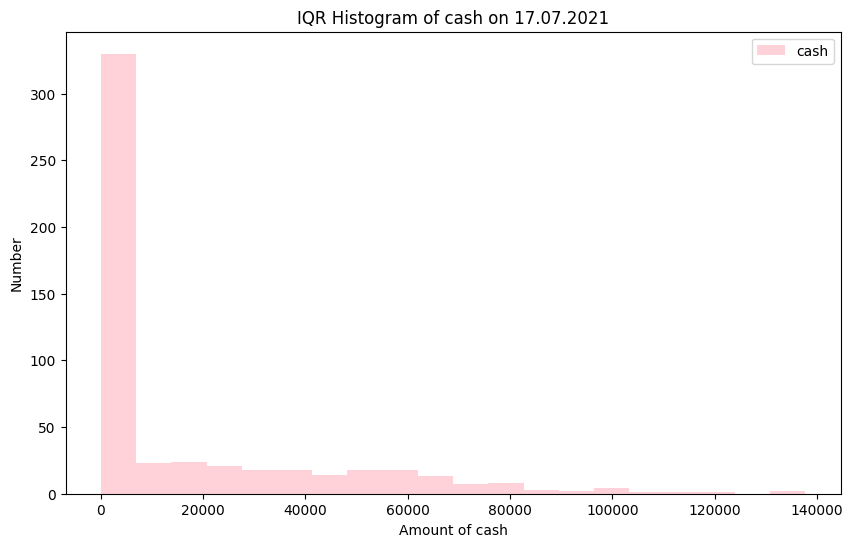

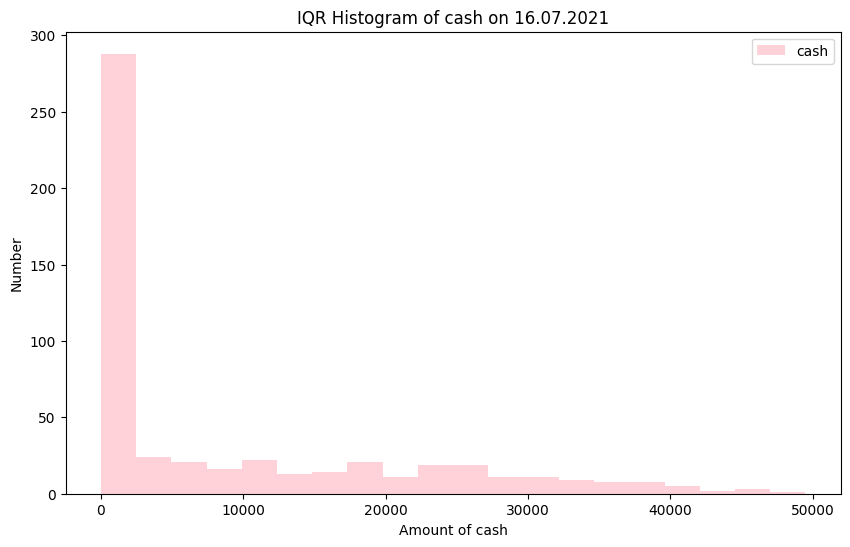

In [41]:
dates_of_interest = ['17.07.2021', '16.07.2021']
for date in dates_of_interest:
    filtered_df = data_df_iqr[data_df_iqr['date'] == date]
    plt.figure(figsize=(10, 6))
    for col in filtered_df.select_dtypes(include='number').columns:
        plt.hist(filtered_df[col], color = 'pink', bins=20, alpha=0.7, label=col)
        plt.title(f'IQR Histogram of {col} on {date}')
        plt.xlabel('Amount of cash')
        plt.ylabel('Number')
        plt.legend()
        plt.show()

### Results
### The results are quite similar; both IQR and 3-sigma methods identified anomalies in game cash. All users with anomalies did not have any transactions. Therefore, a large amount of money combined with zero transactions very likely indicates cheating. 
### According to the charts of the distribution of game cash by day: 07/17/2021 peak of cheater activity, 07/16/2021 - decline in cheater activity, the results of the iqr method give the most coincidences.

# 4. Eliminating anomalies

In [42]:
common_rows = merged_notcheaters_money.merge(iqr_anomalies, on=['user_id'])
cheaters_filtered = merged_notcheaters_money[~merged_notcheaters_money['user_id'].isin(common_rows['user_id'])]
print('Cheaters DataFrame after removing anomalies:\n', cheaters_filtered.head())

Cheaters DataFrame after removing anomalies:
          user_id  cheaters  trans_sum  game_cash
0  TWLWB9-L19SYJ         0       4.97     7050.0
1  SD0L4U-1JG4WN         0       1.98     4100.0
2  QZVG35-P8JKNU         0       1.98     5550.0
3  S2VBV4-ZKBHI6         0       4.97     8500.0
4  DDGKMQ-45SP8R         0       1.98     5200.0


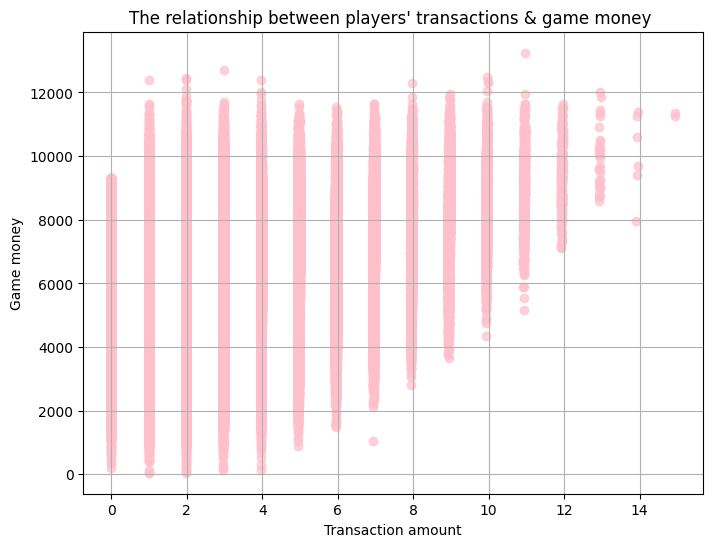

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(cheaters_filtered['trans_sum'], cheaters_filtered['game_cash'], marker='o', color='pink', alpha=0.7)
plt.title("The relationship between players' transactions & game money ")
plt.xlabel('Transaction amount')
plt.ylabel('Game money')
plt.grid(True)
plt.show()

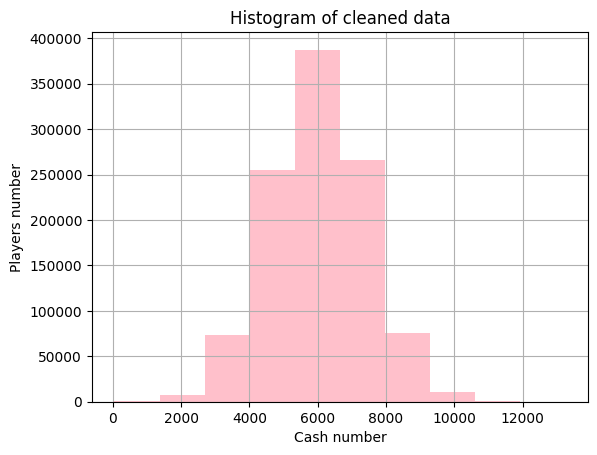

In [44]:
cheaters_filtered['game_cash'].hist(color='pink', bins = 10) 
plt.title('Histogram of cleaned data')
plt.xlabel('Cash number')
plt.ylabel('Players number')
plt.show()

In [45]:
print('Number of players after cheaters elimination:', len(cheaters_filtered)) 

Number of players after cheaters elimination: 1079121


In [46]:
cheaters_filtered['game_cash'].describe()

count    1.078070e+06
mean     6.014418e+03
std      1.395477e+03
min      5.000000e+01
25%      5.050000e+03
50%      6.000000e+03
75%      6.950000e+03
max      1.325000e+04
Name: game_cash, dtype: float64

In [51]:
cheaters_filtered

,user_id,cheaters,trans_sum,game_cash
0,TWLWB9-L19SYJ,0,4.97,7050.0
1,SD0L4U-1JG4WN,0,1.98,4100.0
2,QZVG35-P8JKNU,0,1.98,5550.0
3,S2VBV4-ZKBHI6,0,4.97,8500.0
4,DDGKMQ-45SP8R,0,1.98,5200.0
...,...,...,...,...
1079642,H64167-X6WL6M,0,4.96,5600.0
1079643,RPT9IY-P0M6QC,0,3.96,4450.0
1079644,TOMOLF-K9N5LJ,0,2.98,7850.0
1079645,C960OB-19O8OT,0,3.97,8200.0


### Results
### Now, the data in the scatter plot looks more natural, while the data in the histogram appears symmetric.

# 5. Creating cleaned players file

In [48]:
df_player = cheaters_filtered.drop(columns = ['cheaters'])
df_player.head()

,user_id,trans_sum,game_cash
0,TWLWB9-L19SYJ,4.97,7050.0
1,SD0L4U-1JG4WN,1.98,4100.0
2,QZVG35-P8JKNU,1.98,5550.0
3,S2VBV4-ZKBHI6,4.97,8500.0
4,DDGKMQ-45SP8R,1.98,5200.0


In [50]:
df_player.to_csv('players.csv', index = False)